In [25]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
df = pd.read_csv("Students Dropout and Academic Success Dataset.csv", sep=";")
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [27]:
print("Shape (rows, columns):", df.shape)
df.info()
display(df.describe(include="all").T)
print("\nMissing values per column:")
df.isna().sum().sort_values(ascending=False)


Shape (rows, columns): (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application mode,4424.0,NaN,NaN,NaN,18.669078,17.484682,1.0,1.0,17.0,39.0,57.0
Application order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,8856.642631,2063.566416,33.0,9085.0,9238.0,9556.0,9991.0
Daytime/evening attendance\t,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous qualification,4424.0,NaN,NaN,NaN,4.577758,10.216592,1.0,1.0,1.0,1.0,43.0
Previous qualification (grade),4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nacionality,4424.0,NaN,NaN,NaN,1.873192,6.914514,1.0,1.0,1.0,1.0,109.0
Mother's qualification,4424.0,NaN,NaN,NaN,19.561935,15.603186,1.0,2.0,19.0,37.0,44.0
Father's qualification,4424.0,NaN,NaN,NaN,22.275316,15.343108,1.0,3.0,19.0,37.0,44.0



Missing values per column:


Marital status                                    0
Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
International                                     0
Scholarship holder                                0
Application 

In [28]:
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace('[^0-9a-z]+', '_', regex=True)
              .str.replace('_+', '_', regex=True)
              .str.strip('_'))
df.columns.tolist()[:50]  


['marital_status',
 'application_mode',
 'application_order',
 'course',
 'daytime_evening_attendance',
 'previous_qualification',
 'previous_qualification_grade',
 'nacionality',
 'mother_s_qualification',
 'father_s_qualification',
 'mother_s_occupation',
 'father_s_occupation',
 'admission_grade',
 'displaced',
 'educational_special_needs',
 'debtor',
 'tuition_fees_up_to_date',
 'gender',
 'scholarship_holder',
 'age_at_enrollment',
 'international',
 'curricular_units_1st_sem_credited',
 'curricular_units_1st_sem_enrolled',
 'curricular_units_1st_sem_evaluations',
 'curricular_units_1st_sem_approved',
 'curricular_units_1st_sem_grade',
 'curricular_units_1st_sem_without_evaluations',
 'curricular_units_2nd_sem_credited',
 'curricular_units_2nd_sem_enrolled',
 'curricular_units_2nd_sem_evaluations',
 'curricular_units_2nd_sem_approved',
 'curricular_units_2nd_sem_grade',
 'curricular_units_2nd_sem_without_evaluations',
 'unemployment_rate',
 'inflation_rate',
 'gdp',
 'target']

In [29]:
df_clean = df.dropna().copy()
print("After dropna ->", df_clean.shape)


After dropna -> (4424, 37)


In [30]:
[c for c in df.columns if "curricular" in c]


['curricular_units_1st_sem_credited',
 'curricular_units_1st_sem_enrolled',
 'curricular_units_1st_sem_evaluations',
 'curricular_units_1st_sem_approved',
 'curricular_units_1st_sem_grade',
 'curricular_units_1st_sem_without_evaluations',
 'curricular_units_2nd_sem_credited',
 'curricular_units_2nd_sem_enrolled',
 'curricular_units_2nd_sem_evaluations',
 'curricular_units_2nd_sem_approved',
 'curricular_units_2nd_sem_grade',
 'curricular_units_2nd_sem_without_evaluations']

In [35]:
features = ["curricular_units_1st_sem_grade", "curricular_units_2nd_sem_approved"]
target   = "curricular_units_2nd_sem_grade"

missing = [c for c in features + [target] if c not in df.columns]
if missing:
    print("These columns were not found:", missing)
    print("Columns containing similar words:")
    print([c for c in df.columns if "curricular" in c or "grade" in c or "approved" in c or "passed" in c or "sem" in c])
    raise SystemExit("Please adjust `features`/`target` to exact column names shown above.")
                                       

In [36]:
df_reg = df[features + [target]].copy()

for c in df_reg.columns:
    df_reg[c] = pd.to_numeric(df_reg[c], errors="coerce")

df_reg = df_reg.dropna().reset_index(drop=True)

print("df_reg shape:", df_reg.shape)
df_reg.head()


df_reg shape: (4424, 3)


,curricular_units_1st_sem_grade,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade
0,0.000000,0,0.000000
1,14.000000,6,13.666667
2,0.000000,0,0.000000
3,13.428571,5,12.400000
4,12.333333,6,13.000000


,curricular_units_1st_sem_grade,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade
count,4424.000000,4424.000000,4424.000000
mean,10.640822,4.435805,10.230206
std,4.843663,3.014764,5.210808
min,0.000000,0.000000,0.000000
25%,11.000000,2.000000,10.750000
50%,12.285714,5.000000,12.200000
75%,13.400000,6.000000,13.333333
max,18.875000,20.000000,18.571429


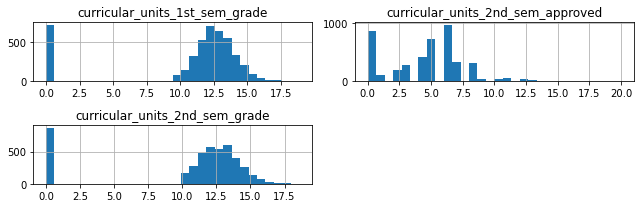

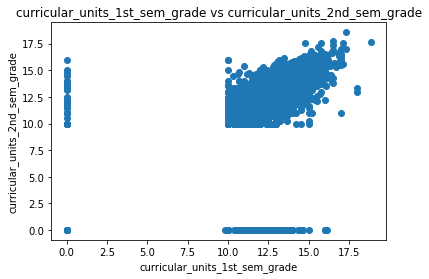

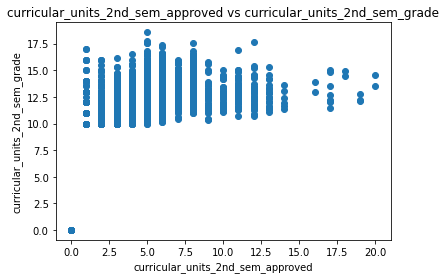

In [37]:
display(df_reg.describe())

import matplotlib.pyplot as plt
df_reg.hist(bins=30, figsize=(9, 3))
plt.tight_layout()
plt.show()

for col in features:
    plt.figure()
    plt.scatter(df_reg[col], df_reg[target])
    plt.title(f"{col} vs {target}")
    plt.xlabel(col); plt.ylabel(target)
    plt.show()


In [40]:
X = df_reg[features].values
y = df_reg[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Coefficients:", dict(zip(features, model.coef_)))
print("Intercept:", model.intercept_)
print(f"R^2: {r2:.3f} | MAE: {mae:.3f} | RMSE: {rmse:.3f}")



Coefficients: {'curricular_units_1st_sem_grade': 0.6321976651562581, 'curricular_units_2nd_sem_approved': 0.6400470143430286}
Intercept: 0.6754830451013394
R^2: 0.762 | MAE: 1.567 | RMSE: 2.539


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

X = df_reg[features].values
y = df_reg[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Coefficients:", dict(zip(features, model.coef_)))
print("Intercept:", model.intercept_)
print(f"R^2: {r2:.3f} | MAE: {mae:.3f} | RMSE: {rmse:.3f}")



Coefficients: {'curricular_units_1st_sem_grade': 0.6321976651562581, 'curricular_units_2nd_sem_approved': 0.6400470143430286}
Intercept: 0.6754830451013394
R^2: 0.762 | MAE: 1.567 | RMSE: 2.539


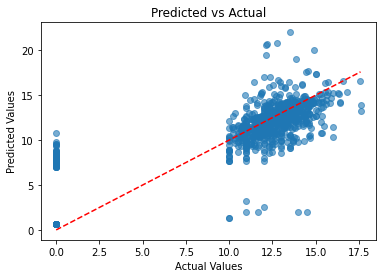

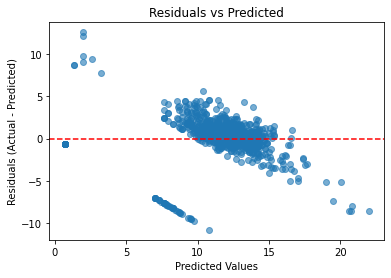

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()
